In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf1
import torch
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import MinMaxScaler, StandardScaler

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset = pd.read_excel('174684_LSTM_data_for_Shreya.xlsx')

In [3]:
dataset.columns

Index(['Date/Timestamp', 'RTD', '1st Suct TC1', 'Air Inlet TC2', 'Evap In TC3',
       'Evap Out TC4', '2nd Suct TC6', 'Liquid Line TC7', '1st Sump TC8',
       '2nd Sump TC9', 'BPHX TC10', 'Setpoint', 'Voltage', 'Offset', 'WA',
       'CA', '1st RPM', '2nd RPM', 'Fan RPM', 'BUS RTD', 'RSSI', 'Latency',
       'State', 'HxHxRec', 'VscRefStageMSB', 'VscRefStageLSB'],
      dtype='object')

In [4]:
variances = dataset.var()
print("Variance of each column:")
print(variances)


Variance of each column:
RTD                3.574970e+01
1st Suct TC1       1.172584e+02
Air Inlet TC2      8.492743e-01
Evap In TC3        1.038308e+02
Evap Out TC4       3.576190e+01
2nd Suct TC6       9.661509e+01
Liquid Line TC7    8.765548e-01
1st Sump TC8       0.000000e+00
2nd Sump TC9       9.442868e+00
BPHX TC10          6.379819e+02
Setpoint           3.855661e+00
Voltage            1.994186e+01
Offset             0.000000e+00
WA                 5.048749e-29
CA                 2.019500e-28
1st RPM            1.289422e+04
2nd RPM            2.498466e+06
Fan RPM            7.516311e+01
BUS RTD            2.019500e-28
RSSI               2.019500e-28
Latency            0.000000e+00
State              4.033802e+00
HxHxRec            6.131744e+02
VscRefStageMSB     2.344159e+02
VscRefStageLSB     3.971982e+02
dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_13156\2751159033.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variances = dataset.var()


In [5]:
timestamp_col = dataset['Date/Timestamp']
data = dataset.drop(columns=['Date/Timestamp','1st Sump TC8','Offset','Latency'])

In [6]:
scaler_minmax = MinMaxScaler()
data_minmax = scaler_minmax.fit_transform(data)

In [7]:
normalized_data_minmax = pd.DataFrame(data_minmax, columns=data.columns)

In [8]:
normalized_dataset_minmax = pd.concat([timestamp_col, normalized_data_minmax], axis=1)

In [9]:
timestamp_col = normalized_dataset_minmax['Date/Timestamp']
normalized_dataset_minmax.columns


Index(['Date/Timestamp', 'RTD', '1st Suct TC1', 'Air Inlet TC2', 'Evap In TC3',
       'Evap Out TC4', '2nd Suct TC6', 'Liquid Line TC7', '2nd Sump TC9',
       'BPHX TC10', 'Setpoint', 'Voltage', 'WA', 'CA', '1st RPM', '2nd RPM',
       'Fan RPM', 'BUS RTD', 'RSSI', 'State', 'HxHxRec', 'VscRefStageMSB',
       'VscRefStageLSB'],
      dtype='object')

In [10]:
normalized_dataset_minmax

,Date/Timestamp,RTD,1st Suct TC1,Air Inlet TC2,Evap In TC3,Evap Out TC4,2nd Suct TC6,Liquid Line TC7,2nd Sump TC9,BPHX TC10,...,CA,1st RPM,2nd RPM,Fan RPM,BUS RTD,RSSI,State,HxHxRec,VscRefStageMSB,VscRefStageLSB
0,2022-07-21 04:00:00,0.005382,0.641929,0.809278,0.015322,0.013874,0.136752,0.852792,0.762821,0.549713,...,0.0,1.000000,0.512195,1.000000,0.0,0.0,0.016129,0.36,0.568047,0.364532
1,2022-07-21 04:01:00,0.005382,0.692022,0.804124,0.015322,0.012807,0.153846,0.852792,0.785256,0.557361,...,0.0,1.000000,0.512195,1.000000,0.0,0.0,0.016129,0.36,0.568047,0.364532
2,2022-07-21 04:02:00,0.005382,0.727273,0.814433,0.014300,0.010672,0.162393,0.857868,0.804487,0.558317,...,0.0,1.000000,0.512195,1.000000,0.0,0.0,0.016129,0.36,0.568047,0.364532
3,2022-07-21 04:03:00,0.004306,0.747681,0.814433,0.016343,0.011740,0.164103,0.857868,0.820513,0.556405,...,0.0,1.000000,0.512195,1.000000,0.0,0.0,0.016129,0.36,0.568047,0.364532
4,2022-07-21 04:04:00,0.004306,0.760668,0.819588,0.014300,0.012807,0.164103,0.862944,0.833333,0.553537,...,0.0,1.000000,0.512195,0.718310,0.0,0.0,0.016129,0.36,0.568047,0.364532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127274,2022-10-17 16:13:00,0.137783,0.805195,0.690722,0.298264,0.187834,0.540171,0.705584,0.551282,0.369025,...,0.0,1.000000,0.000000,1.000000,0.0,0.0,0.016129,0.68,1.000000,1.000000
127275,2022-10-17 16:14:00,0.138859,0.788497,0.695876,0.291113,0.189968,0.569231,0.705584,0.522436,0.183556,...,0.0,1.000000,0.000000,1.000000,0.0,0.0,0.016129,0.68,1.000000,1.000000
127276,2022-10-17 16:15:00,0.138859,0.721707,0.695876,0.284985,0.189968,0.576068,0.705584,0.490385,0.102294,...,0.0,1.000000,0.000000,1.000000,0.0,0.0,0.016129,0.68,1.000000,1.000000
127277,2022-10-19 13:40:00,1.000000,0.697588,0.690722,0.998979,1.000000,0.926496,0.649746,0.000000,0.689293,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.193548,0.00,0.000000,0.000000


In [11]:
# Extract data from the dataset
data = normalized_dataset_minmax.values

# Define parameters
chunk_size = 140
input_size = 120
output_size = 20

# Calculate the total number of chunks
total_chunks = min(len(data) // chunk_size, 900)

# Initialize lists to store input-output pairs
input_chunks = []
output_chunks = []

# Generate chunks
for i in range(total_chunks):
    start_index = i * chunk_size
    end_index = start_index + chunk_size
    
    # Extract chunk
    chunk = data[start_index:end_index]
    
    # Split chunk into input and output
    input_chunk = chunk[:input_size]
    output_chunk = chunk[input_size:]
    
    # Append to lists
    input_chunks.append(input_chunk)
    output_chunks.append(output_chunk)

# Convert lists to numpy arrays
input_data = np.array(input_chunks)
output_data = np.array(output_chunks)

# Print shapes for verification
print("Input data shape:", input_data.shape)
print("Output data shape:", output_data.shape)


Input data shape: (900, 120, 23)
Output data shape: (900, 20, 23)


In [12]:
chunk_index = 899

# Access the 900th chunk from input_data and output_data
input_chunk_900 = input_data[chunk_index]
output_chunk_900 = output_data[chunk_index]

# Print the shapes of the chunks for verification
print("Input chunk shape:", input_chunk_900.shape)
print("Output chunk shape:", output_chunk_900.shape)

# Print the chunks themselves
print("Input chunk:")
print(input_chunk_900)
print("\nOutput chunk:")
print(output_chunk_900)

Input chunk shape: (120, 23)
Output chunk shape: (20, 23)
Input chunk:
[[Timestamp('2022-10-16 16:39:00') 0.11302475780409049 0.7810760667903526
  ... 0.36 1.0 1.0]
 [Timestamp('2022-10-16 16:40:00') 0.11302475780409049 0.7940630797773656
  ... 0.68 1.0 1.0]
 [Timestamp('2022-10-16 16:41:00') 0.11302475780409049 0.803339517625232
  ... 0.68 1.0 1.0]
 ...
 [Timestamp('2022-10-16 18:36:00') 0.11302475780409049 0.7235621521335808
  ... 0.36 1.0 1.0]
 [Timestamp('2022-10-16 18:37:00') 0.11302475780409049 0.7476808905380334
  ... 0.36 1.0 1.0]
 [Timestamp('2022-10-16 18:38:00') 0.11302475780409049 0.7680890538033396
  ... 0.36 1.0 1.0]]

Output chunk:
[[Timestamp('2022-10-16 18:39:00') 0.11302475780409049 0.7884972170686457
  0.6907216494845362 0.17160367722165482 0.16115261472785491
  0.2666666666666667 0.7258883248730965 0.7596153846153847
  0.7055449330783939 0.5 0.959090909090909 0.0 0.0 1.0 0.0 1.0 0.0 0.0
  0.016129032258064516 0.68 1.0 1.0]
 [Timestamp('2022-10-16 18:40:00') 0.113024

In [13]:
time_col = normalized_dataset_minmax['Date/Timestamp']


trainA_timestamps = time_col[:750].values
testA_timestamps = time_col[750:].values

X_trainA, X_testA = input_data[:750], input_data[750:]
y_trainA, y_testA = output_data[:750], output_data[750:]

trainA_timestamp_elements = X_trainA[:, :, 0].copy()
testA_timestamp_elements = X_testA[:, :, 0].copy()

X_trainA_without_timestamp = X_trainA[:, :, 1:]  # Replace time_col_index with the index of 'Date/Timestamp' column
X_testA_without_timestamp =  X_testA[:, :, 1:]

trainA_y_timestamp_elements = y_trainA[:, :, 0].copy()
testA_y_timestamp_elements = y_testA[:, :, 0].copy()

# Drop the 'Date/Timestamp' column from y_train and y_test
y_trainA_without_timestamp = y_trainA[:, :, 1:]
y_testA_without_timestamp = y_testA[:, :, 1:]

In [14]:
X_trainA_without_timestamp

array([[[0.005382131324004336, 0.6419294990723563, 0.809278350515464,
         ..., 0.36, 0.5680473372781065, 0.3645320197044335],
        [0.005382131324004336, 0.692022263450835, 0.8041237113402061,
         ..., 0.36, 0.5680473372781065, 0.3645320197044335],
        [0.005382131324004336, 0.7272727272727273, 0.8144329896907215,
         ..., 0.36, 0.5680473372781065, 0.3645320197044335],
        ...,
        [0.0043057050592035795, 0.7217068645640075, 0.8041237113402061,
         ..., 0.68, 0.5680473372781065, 0.3645320197044335],
        [0.0043057050592035795, 0.6178107606679035, 0.8041237113402061,
         ..., 0.68, 0.5680473372781065, 0.3645320197044335],
        [0.0043057050592035795, 0.44341372912801486, 0.8041237113402061,
         ..., 0.68, 0.5680473372781065, 0.3645320197044335]],

       [[0.0043057050592035795, 0.21521335807050093, 0.8144329896907215,
         ..., 0.04, 0.5680473372781065, 0.3645320197044335],
        [0.0043057050592035795, 0.14656771799628945, 0.81

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Convert data to float32 for compatibility with the model
X_trainA_without_timestamp = X_trainA_without_timestamp.astype(np.float32)
y_trainA_without_timestamp = y_trainA_without_timestamp.astype(np.float32)
X_testA_without_timestamp = X_testA_without_timestamp.astype(np.float32)
y_testA_without_timestamp = y_testA_without_timestamp.astype(np.float32)

# Define the LSTM model architecture
modelA = Sequential([
    Input(shape=(120, 22)),
    LSTM(units=100, return_sequences=True),
    Dropout(0.2),
    LSTM(units=100),
    Dropout(0.2),
    Dense(units=20*22),
    tf.keras.layers.Reshape((20, 22))  # Reshape the output to match the desired shape
])

# Compile the model with a suitable optimizer and loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
modelA.compile(optimizer=optimizer, loss='mean_absolute_error')


# Train the model with the training data and validation data without shuffling
history = modelA.fit(
    X_trainA_without_timestamp, y_trainA_without_timestamp,
    epochs=2000,
    batch_size=32,
    validation_data=(X_testA_without_timestamp, y_testA_without_timestamp),
    verbose=1,
    shuffle=False 
)

# Predictions
predictionsAA = modelA.predict(X_testA_without_timestamp)
predictionsAA.shape


Epoch 1/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 224ms/step - loss: 0.3341 - val_loss: 0.1080
Epoch 2/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - loss: 0.1418 - val_loss: 0.0844
Epoch 3/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - loss: 0.1219 - val_loss: 0.0778
Epoch 4/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 195ms/step - loss: 0.1112 - val_loss: 0.0760
Epoch 5/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - loss: 0.1044 - val_loss: 0.0771
Epoch 6/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 195ms/step - loss: 0.1008 - val_loss: 0.0751
Epoch 7/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - loss: 0.0985 - val_loss: 0.0750
Epoch 8/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - loss: 0.0957 - val_loss: 0.0745
Epoch 9/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - loss: 0.0934 - val_loss: 0.0736
Epoch 10/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - loss: 0.0914 - val_loss: 0.0708
Epoch 11/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - loss: 0.0891 - val_loss: 0.0685
Epoch 12/2000
24/24 ━━━━━━━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - loss: 0.0400 - val_loss: 0.0420
Epoch 68/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step - loss: 0.0384 - val_loss: 0.0391
Epoch 69/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - loss: 0.0374 - val_loss: 0.0401
Epoch 70/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - loss: 0.0391 - val_loss: 0.0406
Epoch 71/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 204ms/step - loss: 0.0367 - val_loss: 0.0390
Epoch 72/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - loss: 0.0379 - val_loss: 0.0392
Epoch 73/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - loss: 0.0374 - val_loss: 0.0399
Epoch 74/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - loss: 0.0401 - val_loss: 0.0412
Epoch 75/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 215ms/step - loss: 0.0357 - val_loss: 0.0408
Epoch 76/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 218ms/step - loss: 0.0364 - val_loss: 0.0407
Epoch 77/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - loss: 0.0391 - val_loss: 0.0422
Epoch 78/2000
24/24 ━━━━━━━━━━━━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - loss: 0.0319 - val_loss: 0.0376
Epoch 134/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - loss: 0.0299 - val_loss: 0.0366
Epoch 135/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - loss: 0.0312 - val_loss: 0.0363
Epoch 136/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 204ms/step - loss: 0.0309 - val_loss: 0.0380
Epoch 137/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - loss: 0.0318 - val_loss: 0.0363
Epoch 138/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - loss: 0.0308 - val_loss: 0.0358
Epoch 139/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step - loss: 0.0311 - val_loss: 0.0376
Epoch 140/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 207ms/step - loss: 0.0313 - val_loss: 0.0363
Epoch 141/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step - loss: 0.0315 - val_loss: 0.0361
Epoch 142/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step - loss: 0.0310 - val_loss: 0.0363
Epoch 143/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 204ms/step - loss: 0.0318 - val_loss: 0.0368
Epoch 144/2000
24/24 ━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - loss: 0.0267 - val_loss: 0.0360
Epoch 200/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - loss: 0.0274 - val_loss: 0.0370
Epoch 201/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - loss: 0.0274 - val_loss: 0.0367
Epoch 202/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - loss: 0.0265 - val_loss: 0.0351
Epoch 203/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - loss: 0.0265 - val_loss: 0.0346
Epoch 204/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - loss: 0.0261 - val_loss: 0.0346
Epoch 205/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - loss: 0.0271 - val_loss: 0.0365
Epoch 206/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - loss: 0.0288 - val_loss: 0.0352
Epoch 207/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - loss: 0.0298 - val_loss: 0.0349
Epoch 208/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - loss: 0.0273 - val_loss: 0.0359
Epoch 209/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - loss: 0.0276 - val_loss: 0.0348
Epoch 210/2000
24/24 ━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - loss: 0.0235 - val_loss: 0.0344
Epoch 266/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - loss: 0.0221 - val_loss: 0.0350
Epoch 267/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - loss: 0.0227 - val_loss: 0.0343
Epoch 268/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - loss: 0.0232 - val_loss: 0.0340
Epoch 269/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 0.0218 - val_loss: 0.0325
Epoch 270/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - loss: 0.0229 - val_loss: 0.0323
Epoch 271/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - loss: 0.0216 - val_loss: 0.0340
Epoch 272/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - loss: 0.0224 - val_loss: 0.0349
Epoch 273/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - loss: 0.0219 - val_loss: 0.0348
Epoch 274/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - loss: 0.0228 - val_loss: 0.0346
Epoch 275/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - loss: 0.0223 - val_loss: 0.0337
Epoch 276/2000
24/24 ━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - loss: 0.0204 - val_loss: 0.0331
Epoch 332/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - loss: 0.0208 - val_loss: 0.0327
Epoch 333/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - loss: 0.0216 - val_loss: 0.0333
Epoch 334/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - loss: 0.0225 - val_loss: 0.0329
Epoch 335/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - loss: 0.0202 - val_loss: 0.0328
Epoch 336/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - loss: 0.0202 - val_loss: 0.0333
Epoch 337/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - loss: 0.0198 - val_loss: 0.0331
Epoch 338/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - loss: 0.0192 - val_loss: 0.0324
Epoch 339/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - loss: 0.0186 - val_loss: 0.0330
Epoch 340/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - loss: 0.0208 - val_loss: 0.0333
Epoch 341/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - loss: 0.0214 - val_loss: 0.0322
Epoch 342/2000
24/24 ━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - loss: 0.0185 - val_loss: 0.0327
Epoch 398/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - loss: 0.0186 - val_loss: 0.0323
Epoch 399/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 185ms/step - loss: 0.0181 - val_loss: 0.0318
Epoch 400/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - loss: 0.0187 - val_loss: 0.0321
Epoch 401/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - loss: 0.0195 - val_loss: 0.0327
Epoch 402/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - loss: 0.0190 - val_loss: 0.0325
Epoch 403/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - loss: 0.0188 - val_loss: 0.0316
Epoch 404/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - loss: 0.0210 - val_loss: 0.0320
Epoch 405/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 256ms/step - loss: 0.0195 - val_loss: 0.0321
Epoch 406/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 185ms/step - loss: 0.0186 - val_loss: 0.0317
Epoch 407/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 0.0189 - val_loss: 0.0331
Epoch 408/2000
24/24 ━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - loss: 0.0180 - val_loss: 0.0314
Epoch 464/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - loss: 0.0173 - val_loss: 0.0313
Epoch 465/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - loss: 0.0184 - val_loss: 0.0315
Epoch 466/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 0.0209 - val_loss: 0.0310
Epoch 467/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - loss: 0.0201 - val_loss: 0.0314
Epoch 468/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - loss: 0.0190 - val_loss: 0.0317
Epoch 469/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - loss: 0.0182 - val_loss: 0.0315
Epoch 470/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 0.0209 - val_loss: 0.0307
Epoch 471/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - loss: 0.0201 - val_loss: 0.0312
Epoch 472/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - loss: 0.0195 - val_loss: 0.0318
Epoch 473/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - loss: 0.0185 - val_loss: 0.0321
Epoch 474/2000
24/24 ━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - loss: 0.0209 - val_loss: 0.0307
Epoch 530/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - loss: 0.0201 - val_loss: 0.0311
Epoch 531/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - loss: 0.0203 - val_loss: 0.0320
Epoch 532/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - loss: 0.0189 - val_loss: 0.0317
Epoch 533/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - loss: 0.0185 - val_loss: 0.0327
Epoch 534/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - loss: 0.0176 - val_loss: 0.0323
Epoch 535/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - loss: 0.0183 - val_loss: 0.0308
Epoch 536/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - loss: 0.0179 - val_loss: 0.0314
Epoch 537/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - loss: 0.0178 - val_loss: 0.0306
Epoch 538/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - loss: 0.0181 - val_loss: 0.0315
Epoch 539/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 0.0179 - val_loss: 0.0318
Epoch 540/2000
24/24 ━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 0.0181 - val_loss: 0.0307
Epoch 596/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - loss: 0.0174 - val_loss: 0.0305
Epoch 597/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - loss: 0.0169 - val_loss: 0.0305
Epoch 598/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - loss: 0.0170 - val_loss: 0.0316
Epoch 599/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - loss: 0.0171 - val_loss: 0.0312
Epoch 600/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - loss: 0.0181 - val_loss: 0.0302
Epoch 601/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - loss: 0.0189 - val_loss: 0.0311
Epoch 602/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - loss: 0.0176 - val_loss: 0.0308
Epoch 603/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - loss: 0.0188 - val_loss: 0.0309
Epoch 604/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - loss: 0.0174 - val_loss: 0.0318
Epoch 605/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - loss: 0.0187 - val_loss: 0.0315
Epoch 606/2000
24/24 ━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 0.0179 - val_loss: 0.0314
Epoch 662/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - loss: 0.0179 - val_loss: 0.0310
Epoch 663/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 177ms/step - loss: 0.0167 - val_loss: 0.0308
Epoch 664/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 177ms/step - loss: 0.0165 - val_loss: 0.0306
Epoch 665/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 0.0167 - val_loss: 0.0305
Epoch 666/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - loss: 0.0178 - val_loss: 0.0308
Epoch 667/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - loss: 0.0172 - val_loss: 0.0302
Epoch 668/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - loss: 0.0167 - val_loss: 0.0303
Epoch 669/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - loss: 0.0166 - val_loss: 0.0306
Epoch 670/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 0.0178 - val_loss: 0.0308
Epoch 671/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - loss: 0.0169 - val_loss: 0.0310
Epoch 672/2000
24/24 ━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 177ms/step - loss: 0.0161 - val_loss: 0.0301
Epoch 728/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 0.0166 - val_loss: 0.0299
Epoch 729/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 0.0175 - val_loss: 0.0304
Epoch 730/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step - loss: 0.0166 - val_loss: 0.0307
Epoch 731/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - loss: 0.0169 - val_loss: 0.0321
Epoch 732/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - loss: 0.0192 - val_loss: 0.0323
Epoch 733/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - loss: 0.0179 - val_loss: 0.0299
Epoch 734/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 0.0171 - val_loss: 0.0301
Epoch 735/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - loss: 0.0161 - val_loss: 0.0302
Epoch 736/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 0.0170 - val_loss: 0.0308
Epoch 737/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - loss: 0.0168 - val_loss: 0.0313
Epoch 738/2000
24/24 ━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - loss: 0.0162 - val_loss: 0.0309
Epoch 794/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 0.0165 - val_loss: 0.0310
Epoch 795/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - loss: 0.0171 - val_loss: 0.0310
Epoch 796/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 0.0179 - val_loss: 0.0308
Epoch 797/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - loss: 0.0184 - val_loss: 0.0324
Epoch 798/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - loss: 0.0188 - val_loss: 0.0313
Epoch 799/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - loss: 0.0199 - val_loss: 0.0327
Epoch 800/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - loss: 0.0192 - val_loss: 0.0311
Epoch 801/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - loss: 0.0179 - val_loss: 0.0305
Epoch 802/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - loss: 0.0183 - val_loss: 0.0304
Epoch 803/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - loss: 0.0169 - val_loss: 0.0303
Epoch 804/2000
24/24 ━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 0.0168 - val_loss: 0.0301
Epoch 860/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - loss: 0.0184 - val_loss: 0.0305
Epoch 861/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - loss: 0.0176 - val_loss: 0.0304
Epoch 862/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - loss: 0.0161 - val_loss: 0.0305
Epoch 863/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - loss: 0.0165 - val_loss: 0.0305
Epoch 864/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - loss: 0.0159 - val_loss: 0.0303
Epoch 865/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - loss: 0.0162 - val_loss: 0.0299
Epoch 866/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 189ms/step - loss: 0.0160 - val_loss: 0.0301
Epoch 867/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - loss: 0.0166 - val_loss: 0.0306
Epoch 868/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - loss: 0.0166 - val_loss: 0.0311
Epoch 869/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 0.0174 - val_loss: 0.0307
Epoch 870/2000
24/24 ━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - loss: 0.0169 - val_loss: 0.0315
Epoch 926/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - loss: 0.0168 - val_loss: 0.0302
Epoch 927/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - loss: 0.0178 - val_loss: 0.0297
Epoch 928/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - loss: 0.0162 - val_loss: 0.0312
Epoch 929/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - loss: 0.0161 - val_loss: 0.0307
Epoch 930/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - loss: 0.0169 - val_loss: 0.0311
Epoch 931/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - loss: 0.0168 - val_loss: 0.0298
Epoch 932/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 0.0165 - val_loss: 0.0303
Epoch 933/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - loss: 0.0163 - val_loss: 0.0302
Epoch 934/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - loss: 0.0176 - val_loss: 0.0310
Epoch 935/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - loss: 0.0179 - val_loss: 0.0310
Epoch 936/2000
24/24 ━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - loss: 0.0171 - val_loss: 0.0304
Epoch 992/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 0.0169 - val_loss: 0.0307
Epoch 993/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - loss: 0.0172 - val_loss: 0.0314
Epoch 994/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - loss: 0.0160 - val_loss: 0.0303
Epoch 995/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 118s 5s/step - loss: 0.0174 - val_loss: 0.0301
Epoch 996/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 230ms/step - loss: 0.0166 - val_loss: 0.0301
Epoch 997/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step - loss: 0.0171 - val_loss: 0.0302
Epoch 998/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - loss: 0.0161 - val_loss: 0.0304
Epoch 999/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - loss: 0.0161 - val_loss: 0.0302
Epoch 1000/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - loss: 0.0160 - val_loss: 0.0298
Epoch 1001/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - loss: 0.0158 - val_loss: 0.0296
Epoch 1002/2000
24/24 ━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - loss: 0.0174 - val_loss: 0.0303
Epoch 1057/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - loss: 0.0166 - val_loss: 0.0295
Epoch 1058/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - loss: 0.0188 - val_loss: 0.0302
Epoch 1059/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - loss: 0.0171 - val_loss: 0.0301
Epoch 1060/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - loss: 0.0163 - val_loss: 0.0303
Epoch 1061/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - loss: 0.0180 - val_loss: 0.0307
Epoch 1062/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - loss: 0.0175 - val_loss: 0.0301
Epoch 1063/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - loss: 0.0169 - val_loss: 0.0295
Epoch 1064/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - loss: 0.0170 - val_loss: 0.0297
Epoch 1065/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - loss: 0.0179 - val_loss: 0.0303
Epoch 1066/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step - loss: 0.0179 - val_loss: 0.0308
Epoch 1067/2000

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - loss: 0.0175 - val_loss: 0.0301
Epoch 1122/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - loss: 0.0174 - val_loss: 0.0307
Epoch 1123/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - loss: 0.0180 - val_loss: 0.0299
Epoch 1124/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - loss: 0.0181 - val_loss: 0.0313
Epoch 1125/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - loss: 0.0175 - val_loss: 0.0305
Epoch 1126/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - loss: 0.0172 - val_loss: 0.0298
Epoch 1127/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - loss: 0.0168 - val_loss: 0.0296
Epoch 1128/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - loss: 0.0175 - val_loss: 0.0303
Epoch 1129/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - loss: 0.0181 - val_loss: 0.0308
Epoch 1130/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - loss: 0.0175 - val_loss: 0.0305
Epoch 1131/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - loss: 0.0167 - val_loss: 0.0299
Epoch 1132/2000

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - loss: 0.0171 - val_loss: 0.0301
Epoch 1187/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - loss: 0.0164 - val_loss: 0.0305
Epoch 1188/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - loss: 0.0163 - val_loss: 0.0313
Epoch 1189/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - loss: 0.0164 - val_loss: 0.0307
Epoch 1190/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - loss: 0.0176 - val_loss: 0.0299
Epoch 1191/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - loss: 0.0174 - val_loss: 0.0307
Epoch 1192/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - loss: 0.0165 - val_loss: 0.0311
Epoch 1193/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - loss: 0.0198 - val_loss: 0.0307
Epoch 1194/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - loss: 0.0179 - val_loss: 0.0295
Epoch 1195/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - loss: 0.0159 - val_loss: 0.0301
Epoch 1196/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 0.0166 - val_loss: 0.0302
Epoch 1197/2000

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - loss: 0.0164 - val_loss: 0.0296
Epoch 1252/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - loss: 0.0171 - val_loss: 0.0301
Epoch 1253/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - loss: 0.0157 - val_loss: 0.0301
Epoch 1254/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step - loss: 0.0175 - val_loss: 0.0301
Epoch 1255/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - loss: 0.0172 - val_loss: 0.0300
Epoch 1256/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - loss: 0.0168 - val_loss: 0.0297
Epoch 1257/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - loss: 0.0160 - val_loss: 0.0299
Epoch 1258/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 192ms/step - loss: 0.0163 - val_loss: 0.0300
Epoch 1259/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - loss: 0.0168 - val_loss: 0.0307
Epoch 1260/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 0.0162 - val_loss: 0.0299
Epoch 1261/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - loss: 0.0172 - val_loss: 0.0299
Epoch 1262/2000

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 0.0159 - val_loss: 0.0300
Epoch 1317/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - loss: 0.0165 - val_loss: 0.0308
Epoch 1318/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - loss: 0.0162 - val_loss: 0.0301
Epoch 1319/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - loss: 0.0162 - val_loss: 0.0301
Epoch 1320/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - loss: 0.0170 - val_loss: 0.0298
Epoch 1321/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step - loss: 0.0164 - val_loss: 0.0313
Epoch 1322/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - loss: 0.0173 - val_loss: 0.0316
Epoch 1323/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step - loss: 0.0164 - val_loss: 0.0297
Epoch 1324/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - loss: 0.0168 - val_loss: 0.0301
Epoch 1325/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - loss: 0.0158 - val_loss: 0.0303
Epoch 1326/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - loss: 0.0167 - val_loss: 0.0310
Epoch 1327/2000

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - loss: 0.0158 - val_loss: 0.0293
Epoch 1382/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - loss: 0.0155 - val_loss: 0.0301
Epoch 1383/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - loss: 0.0157 - val_loss: 0.0301
Epoch 1384/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step - loss: 0.0158 - val_loss: 0.0299
Epoch 1385/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - loss: 0.0161 - val_loss: 0.0302
Epoch 1386/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 0.0158 - val_loss: 0.0297
Epoch 1387/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step - loss: 0.0165 - val_loss: 0.0297
Epoch 1388/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - loss: 0.0158 - val_loss: 0.0303
Epoch 1389/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - loss: 0.0158 - val_loss: 0.0297
Epoch 1390/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step - loss: 0.0164 - val_loss: 0.0303
Epoch 1391/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 222ms/step - loss: 0.0153 - val_loss: 0.0304
Epoch 1392/2000

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - loss: 0.0155 - val_loss: 0.0296
Epoch 1447/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - loss: 0.0158 - val_loss: 0.0306
Epoch 1448/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - loss: 0.0157 - val_loss: 0.0304
Epoch 1449/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step - loss: 0.0161 - val_loss: 0.0294
Epoch 1450/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 185ms/step - loss: 0.0169 - val_loss: 0.0310
Epoch 1451/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 185ms/step - loss: 0.0160 - val_loss: 0.0296
Epoch 1452/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - loss: 0.0168 - val_loss: 0.0301
Epoch 1453/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - loss: 0.0162 - val_loss: 0.0307
Epoch 1454/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step - loss: 0.0161 - val_loss: 0.0301
Epoch 1455/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step - loss: 0.0154 - val_loss: 0.0294
Epoch 1456/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step - loss: 0.0172 - val_loss: 0.0299
Epoch 1457/2000

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - loss: 0.0158 - val_loss: 0.0300
Epoch 1512/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - loss: 0.0157 - val_loss: 0.0303
Epoch 1513/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - loss: 0.0152 - val_loss: 0.0301
Epoch 1514/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - loss: 0.0157 - val_loss: 0.0297
Epoch 1515/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - loss: 0.0164 - val_loss: 0.0294
Epoch 1516/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - loss: 0.0157 - val_loss: 0.0295
Epoch 1517/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - loss: 0.0160 - val_loss: 0.0310
Epoch 1518/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 189ms/step - loss: 0.0155 - val_loss: 0.0300
Epoch 1519/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - loss: 0.0160 - val_loss: 0.0295
Epoch 1520/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step - loss: 0.0156 - val_loss: 0.0302
Epoch 1521/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - loss: 0.0155 - val_loss: 0.0301
Epoch 1522/2000

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - loss: 0.0155 - val_loss: 0.0299
Epoch 1577/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - loss: 0.0163 - val_loss: 0.0305
Epoch 1578/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - loss: 0.0157 - val_loss: 0.0295
Epoch 1579/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - loss: 0.0169 - val_loss: 0.0298
Epoch 1580/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - loss: 0.0153 - val_loss: 0.0295
Epoch 1581/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - loss: 0.0166 - val_loss: 0.0299
Epoch 1582/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - loss: 0.0159 - val_loss: 0.0295
Epoch 1583/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - loss: 0.0165 - val_loss: 0.0296
Epoch 1584/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - loss: 0.0160 - val_loss: 0.0304
Epoch 1585/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - loss: 0.0154 - val_loss: 0.0297
Epoch 1586/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 0.0158 - val_loss: 0.0296
Epoch 1587/2000

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - loss: 0.0156 - val_loss: 0.0297
Epoch 1642/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - loss: 0.0160 - val_loss: 0.0296
Epoch 1643/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - loss: 0.0157 - val_loss: 0.0302
Epoch 1644/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 0.0160 - val_loss: 0.0301
Epoch 1645/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - loss: 0.0156 - val_loss: 0.0293
Epoch 1646/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - loss: 0.0154 - val_loss: 0.0297
Epoch 1647/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 0.0158 - val_loss: 0.0300
Epoch 1648/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - loss: 0.0157 - val_loss: 0.0300
Epoch 1649/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step - loss: 0.0155 - val_loss: 0.0301
Epoch 1650/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - loss: 0.0159 - val_loss: 0.0305
Epoch 1651/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - loss: 0.0159 - val_loss: 0.0298
Epoch 1652/2000

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - loss: 0.0151 - val_loss: 0.0293
Epoch 1707/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 0.0151 - val_loss: 0.0296
Epoch 1708/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - loss: 0.0154 - val_loss: 0.0301
Epoch 1709/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step - loss: 0.0154 - val_loss: 0.0297
Epoch 1710/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - loss: 0.0155 - val_loss: 0.0293
Epoch 1711/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step - loss: 0.0157 - val_loss: 0.0299
Epoch 1712/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - loss: 0.0152 - val_loss: 0.0300
Epoch 1713/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step - loss: 0.0154 - val_loss: 0.0302
Epoch 1714/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - loss: 0.0167 - val_loss: 0.0307
Epoch 1715/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - loss: 0.0162 - val_loss: 0.0298
Epoch 1716/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - loss: 0.0164 - val_loss: 0.0296
Epoch 1717/2000

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - loss: 0.0152 - val_loss: 0.0297
Epoch 1772/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step - loss: 0.0162 - val_loss: 0.0300
Epoch 1773/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - loss: 0.0159 - val_loss: 0.0306
Epoch 1774/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - loss: 0.0160 - val_loss: 0.0306
Epoch 1775/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - loss: 0.0160 - val_loss: 0.0296
Epoch 1776/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - loss: 0.0156 - val_loss: 0.0293
Epoch 1777/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - loss: 0.0157 - val_loss: 0.0300
Epoch 1778/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - loss: 0.0155 - val_loss: 0.0303
Epoch 1779/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - loss: 0.0156 - val_loss: 0.0295
Epoch 1780/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 195ms/step - loss: 0.0154 - val_loss: 0.0297
Epoch 1781/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - loss: 0.0154 - val_loss: 0.0299
Epoch 1782/2000

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - loss: 0.0154 - val_loss: 0.0296
Epoch 1837/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step - loss: 0.0153 - val_loss: 0.0302
Epoch 1838/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - loss: 0.0158 - val_loss: 0.0305
Epoch 1839/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step - loss: 0.0159 - val_loss: 0.0295
Epoch 1840/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - loss: 0.0162 - val_loss: 0.0300
Epoch 1841/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step - loss: 0.0158 - val_loss: 0.0297
Epoch 1842/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - loss: 0.0174 - val_loss: 0.0306
Epoch 1843/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - loss: 0.0157 - val_loss: 0.0296
Epoch 1844/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - loss: 0.0160 - val_loss: 0.0297
Epoch 1845/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - loss: 0.0154 - val_loss: 0.0291
Epoch 1846/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - loss: 0.0154 - val_loss: 0.0306
Epoch 1847/2000

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - loss: 0.0154 - val_loss: 0.0298
Epoch 1902/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - loss: 0.0157 - val_loss: 0.0293
Epoch 1903/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - loss: 0.0153 - val_loss: 0.0300
Epoch 1904/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - loss: 0.0156 - val_loss: 0.0301
Epoch 1905/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - loss: 0.0150 - val_loss: 0.0292
Epoch 1906/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - loss: 0.0162 - val_loss: 0.0299
Epoch 1907/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - loss: 0.0152 - val_loss: 0.0297
Epoch 1908/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - loss: 0.0153 - val_loss: 0.0300
Epoch 1909/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - loss: 0.0159 - val_loss: 0.0297
Epoch 1910/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - loss: 0.0156 - val_loss: 0.0301
Epoch 1911/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - loss: 0.0158 - val_loss: 0.0296
Epoch 1912/2000

24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 186ms/step - loss: 0.0153 - val_loss: 0.0300
Epoch 1967/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step - loss: 0.0153 - val_loss: 0.0300
Epoch 1968/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 194ms/step - loss: 0.0156 - val_loss: 0.0302
Epoch 1969/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - loss: 0.0158 - val_loss: 0.0298
Epoch 1970/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - loss: 0.0160 - val_loss: 0.0298
Epoch 1971/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - loss: 0.0161 - val_loss: 0.0299
Epoch 1972/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - loss: 0.0159 - val_loss: 0.0303
Epoch 1973/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - loss: 0.0156 - val_loss: 0.0298
Epoch 1974/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - loss: 0.0154 - val_loss: 0.0295
Epoch 1975/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step - loss: 0.0151 - val_loss: 0.0299
Epoch 1976/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - loss: 0.0152 - val_loss: 0.0292
Epoch 1977/2000

(150, 20, 22)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 120, 100)            │          49,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 120, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 440)                 │          44,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 20, 22)              │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 522,122 (1.99 MB)

 Trainable params: 174,040 (679.84 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 348,082 (1.33 MB)

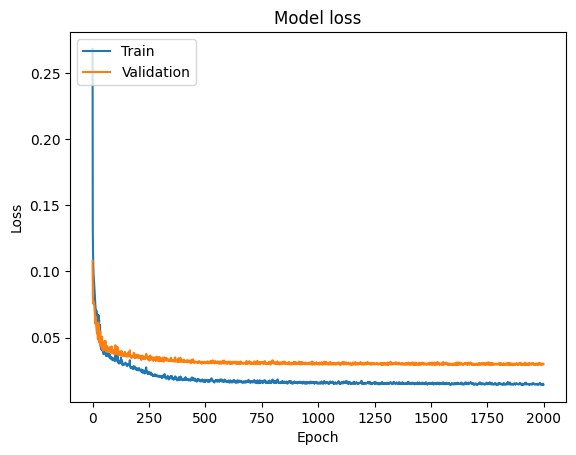

In [16]:
modelA.summary()

import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute metrics
mae = mean_absolute_error(y_testA_without_timestamp[1], predictionsAA[1])
mse = mean_squared_error(y_testA_without_timestamp[1], predictionsAA[1])
print(f"Mean Squared Error Per Chunk: {mse}")


print(mae)
print(y_testA_without_timestamp.shape)
print(predictionsAA.shape)


Mean Squared Error Per Chunk: 0.0004601189575623721
0.008157402
(150, 20, 22)
(150, 20, 22)


In [19]:
total_chunk_avg=[]
for num in range(predictionsAA.shape[0]):
    mae_chunk = np.mean(np.abs(predictionsAA[num] - y_testA_without_timestamp[num]), axis=0)
    total_chunk_avg.append(mae_chunk)
print(np.mean(total_chunk_avg))

0.025988765


0.8886827230453491
0.6085343360900879
0.28014838695526123
0.7486085295677185
0


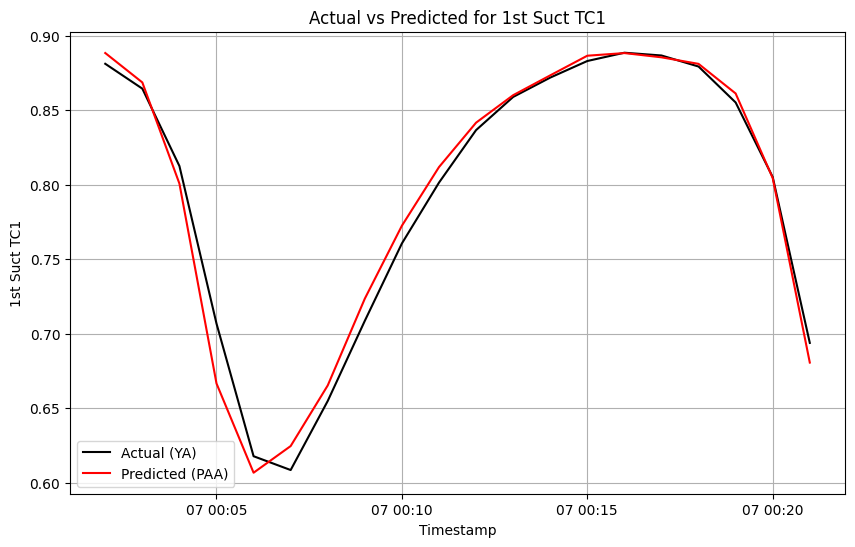

0.32788559794425964
0.08580183982849121
0.24208375811576843
0.20684371888637543
1


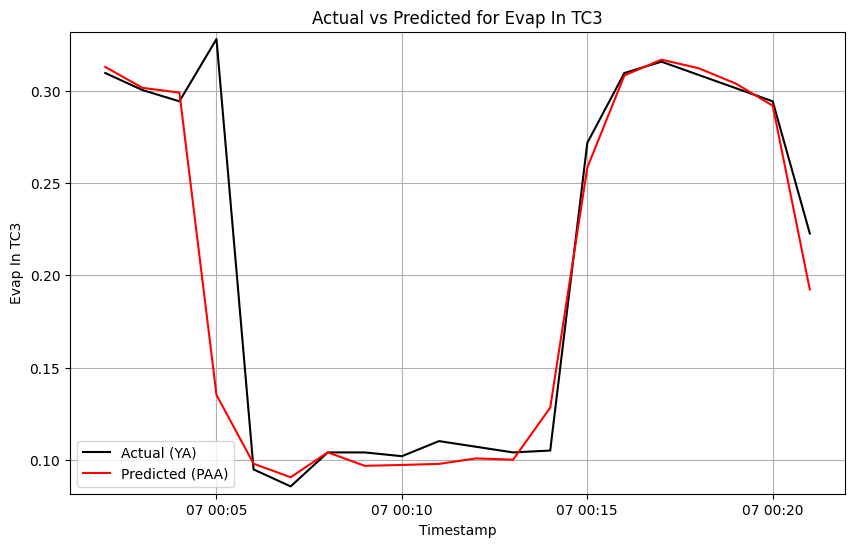

0.18676628172397614
0.15154749155044556
0.03521879017353058
0.16915688663721085
1


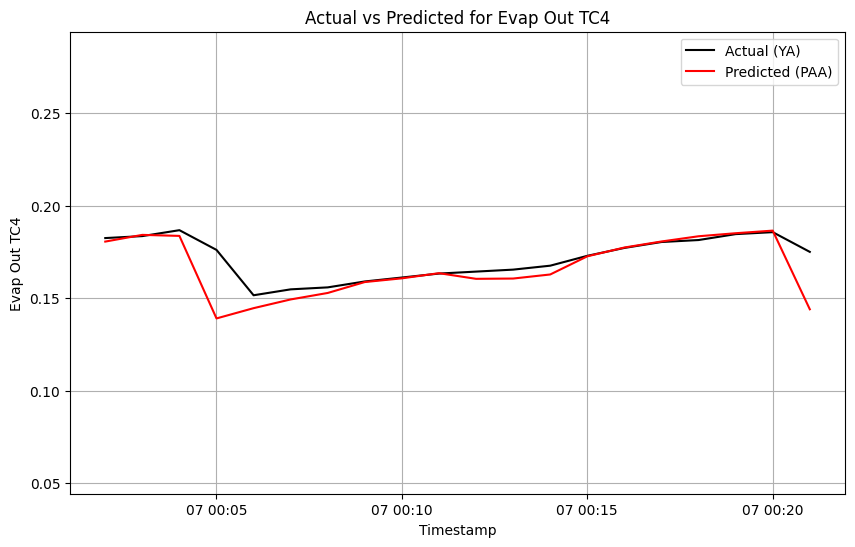

0.5777778029441833
0.18632479012012482
0.39145301282405853
0.3820512965321541
0


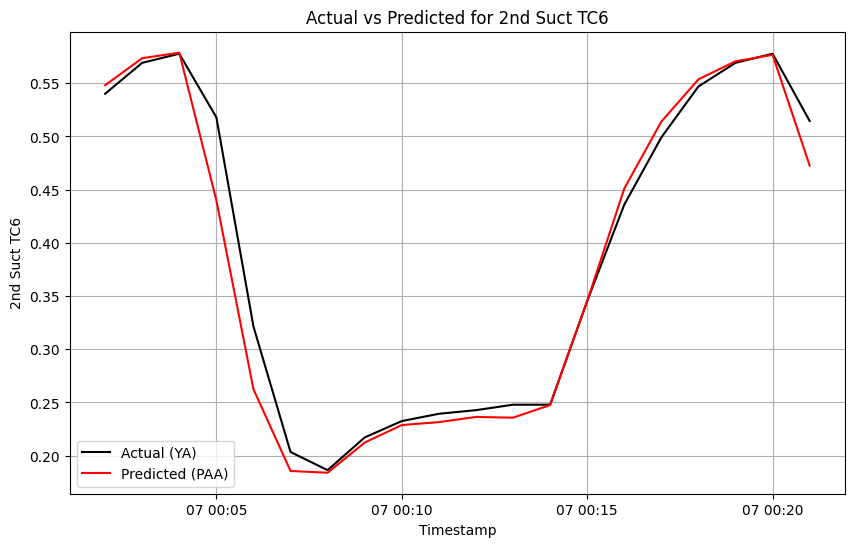

0.8878205418586731
0.5512820482254028
0.33653849363327026
0.719551295042038
0


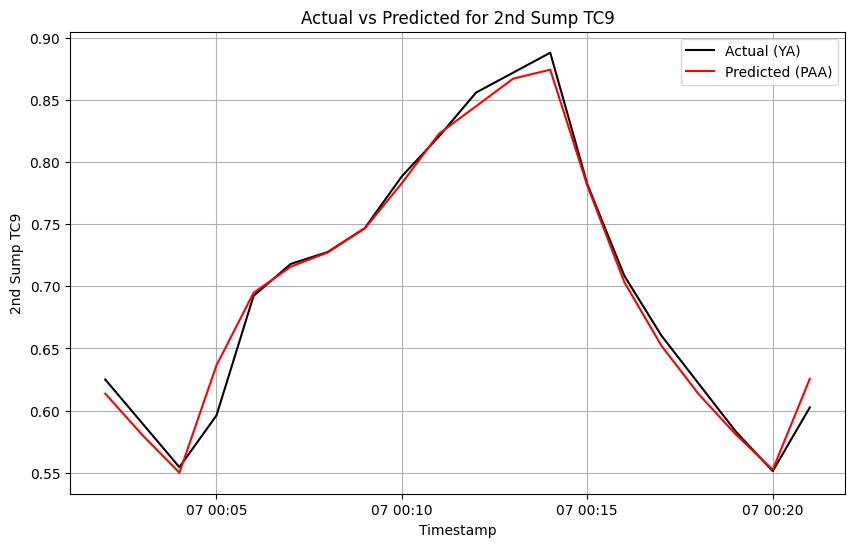

0.8078393936157227
0.116634801030159
0.6912045925855637
0.4622370973229408
0


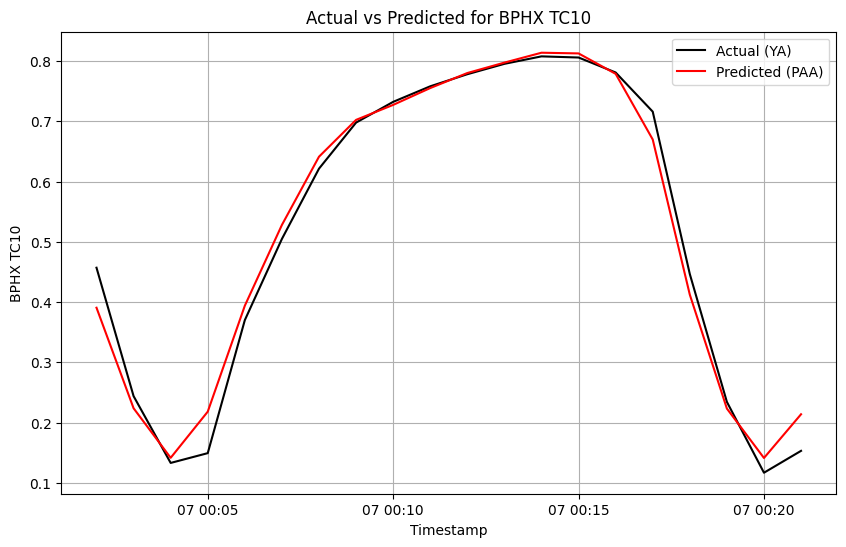

1.0
0.0
1.0
0.5
0


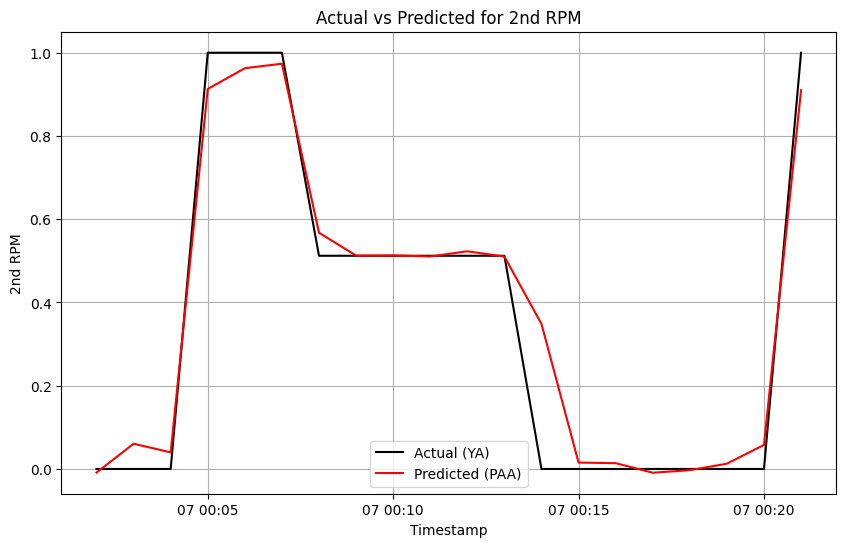

1.0
0.8309859037399292
0.1690140962600708
0.9154929518699646
1


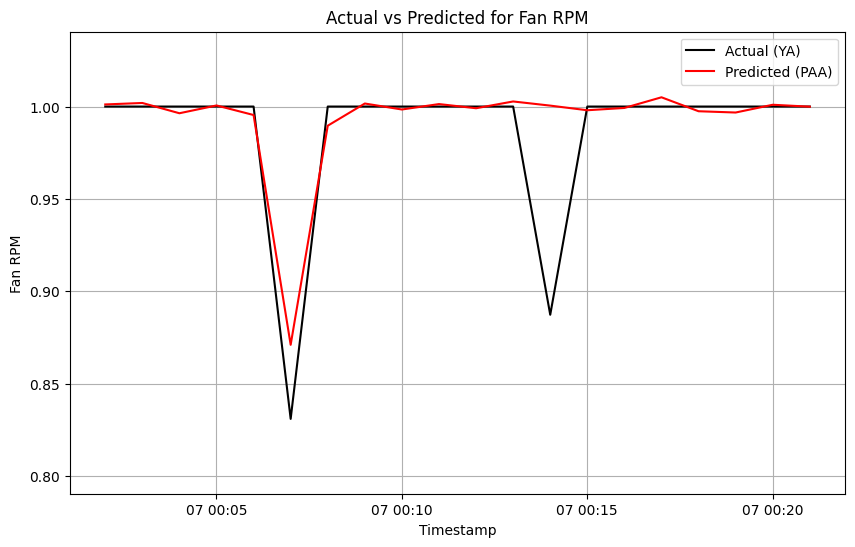

0.0
0.0
0.0
0.0
1


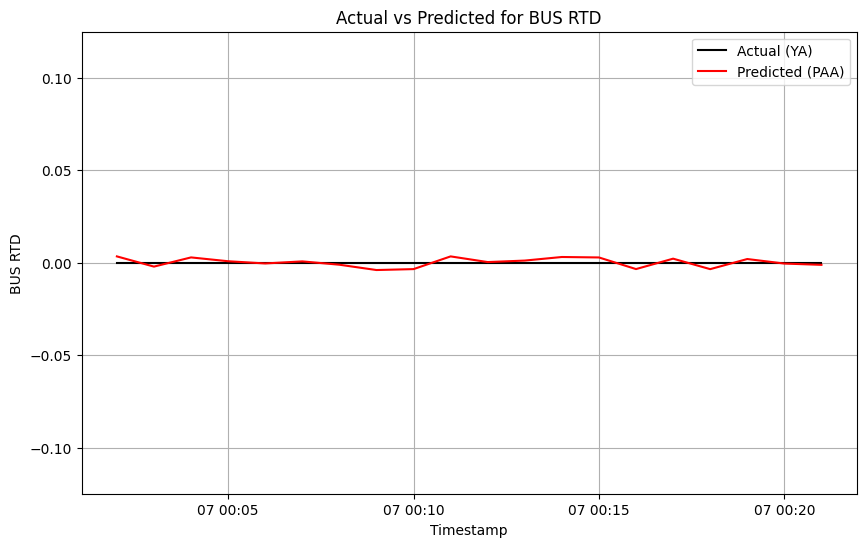

0.0
0.0
0.0
0.0
1


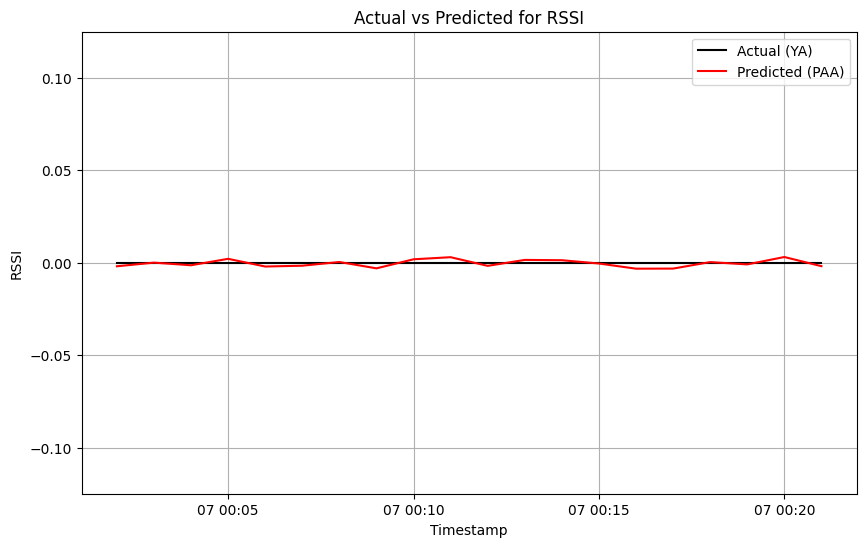

0.11290322244167328
0.08064515888690948
0.032258063554763794
0.09677419066429138
1


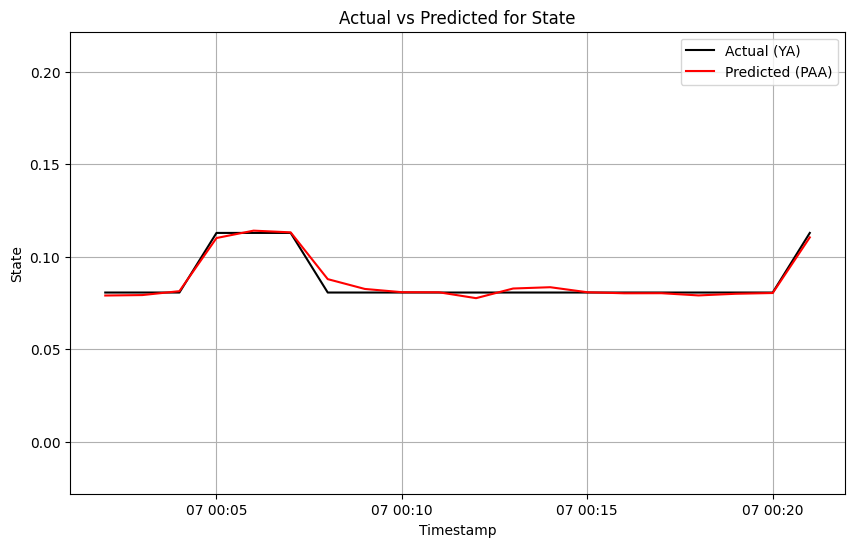

0.6800000071525574
0.03999999910593033
0.640000008046627
0.36000000312924385
0


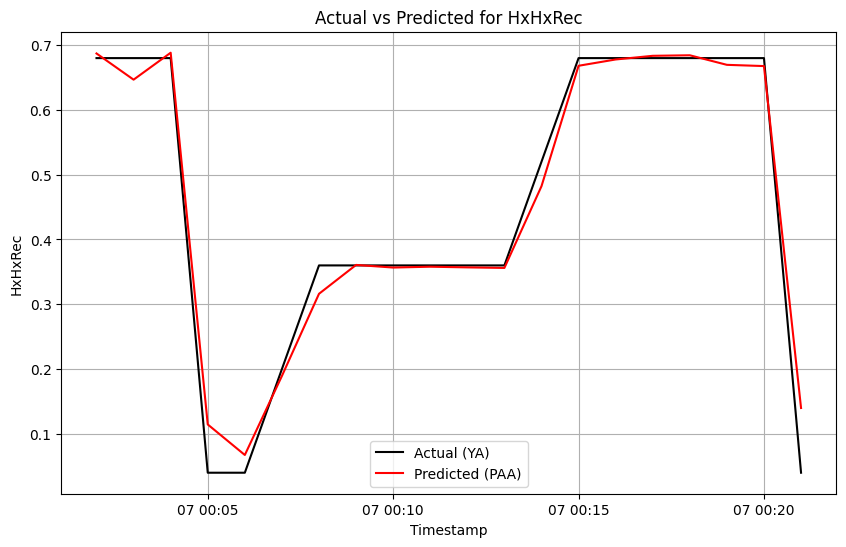

0.7164948582649231
0.6855670213699341
0.030927836894989014
0.7010309398174286
1


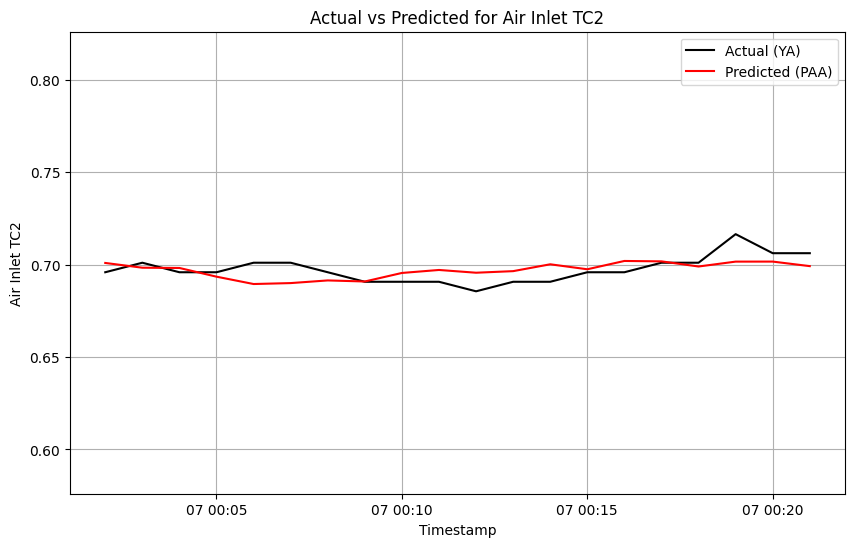

0.7360405921936035
0.7258883118629456
0.010152280330657959
0.7309644520282745
1


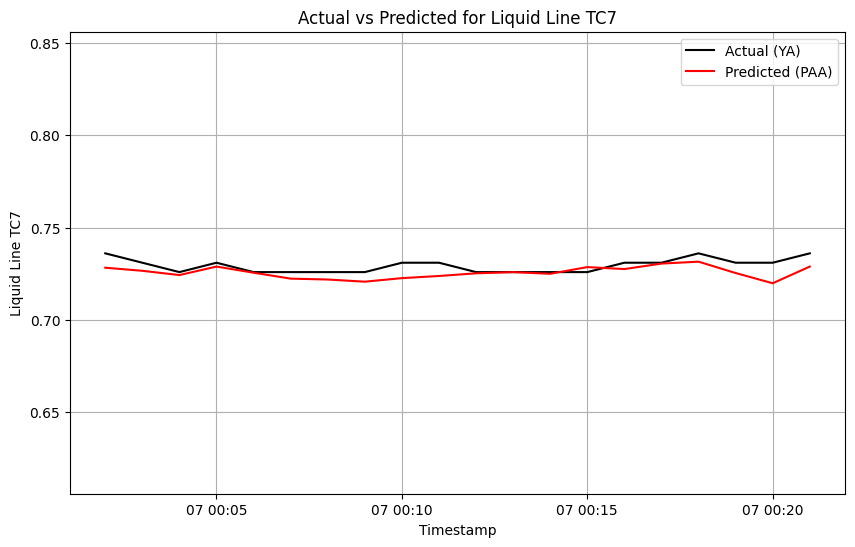

0.0
0.0
0.0
0.0
1


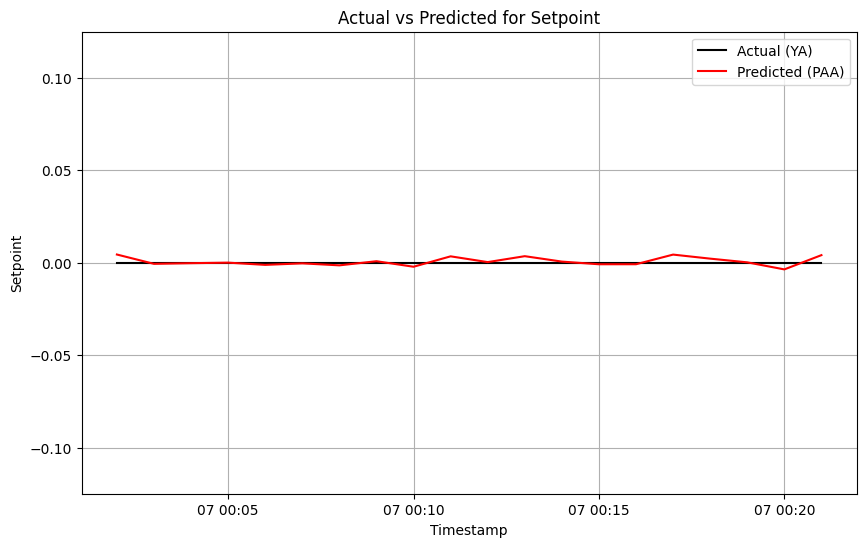

0.9818181991577148
0.9772727489471436
0.004545450210571289
0.9795454740524292
1


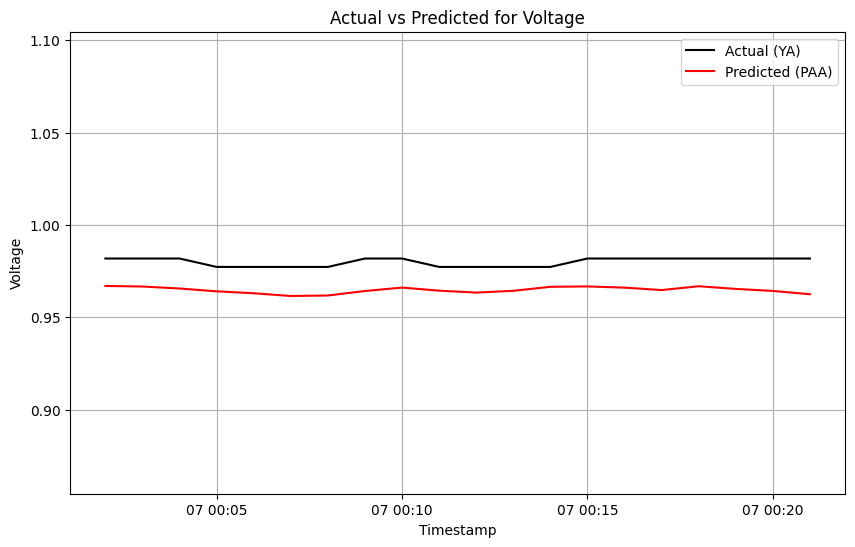

0.1539289504289627
0.15177610516548157
0.00215284526348114
0.15285252779722214
1


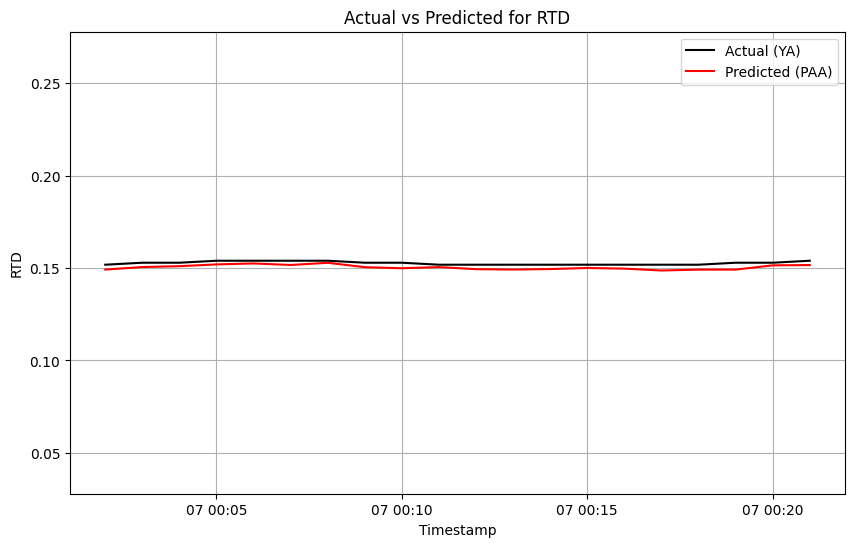

0.0
0.0
0.0
0.0
1


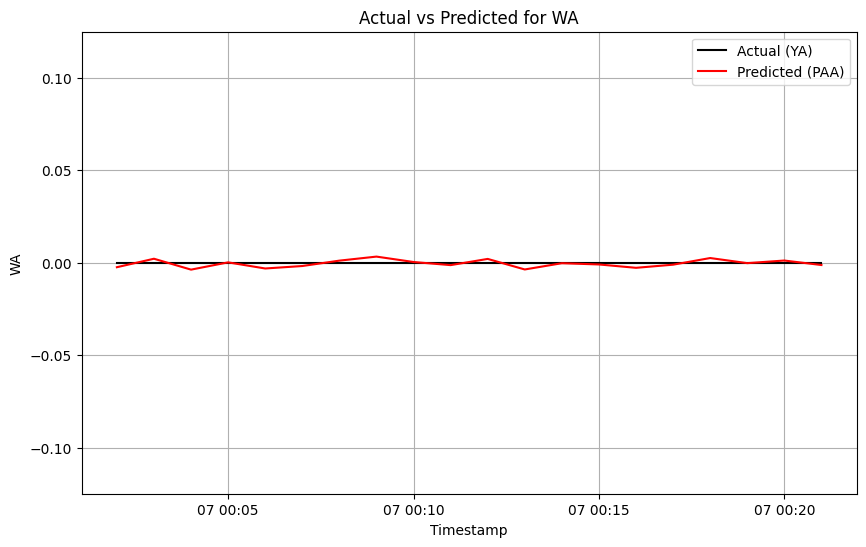

0.0
0.0
0.0
0.0
1


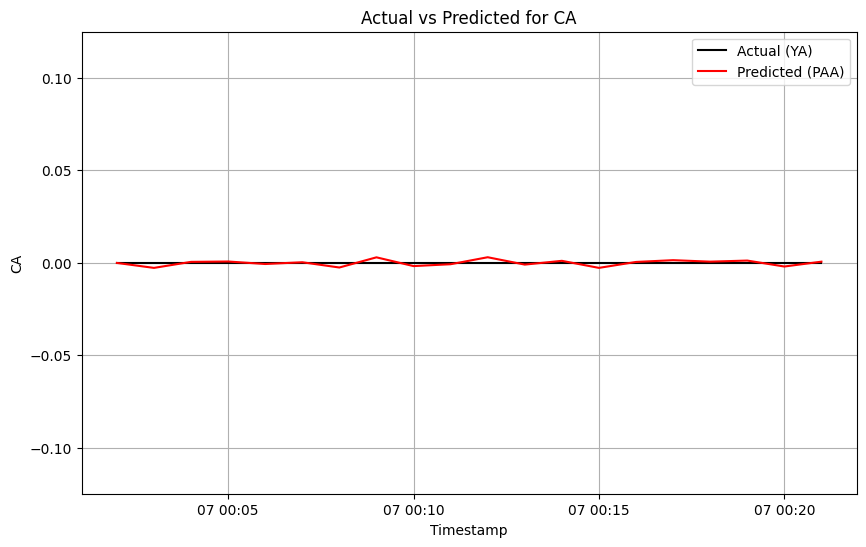

1.0
1.0
0.0
1.0
1


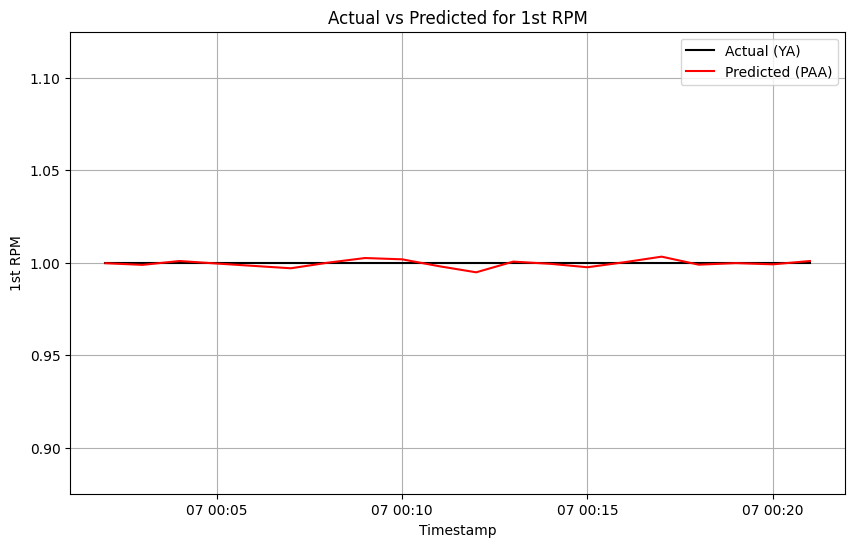

0.5680473446846008
0.5680473446846008
0.0
0.5680473446846008
1


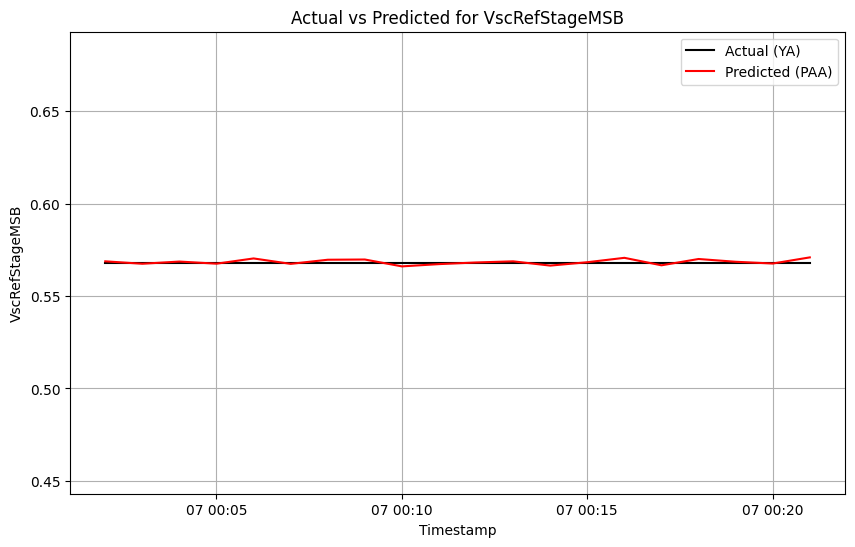

0.3645320236682892
0.3645320236682892
0.0
0.3645320236682892
1


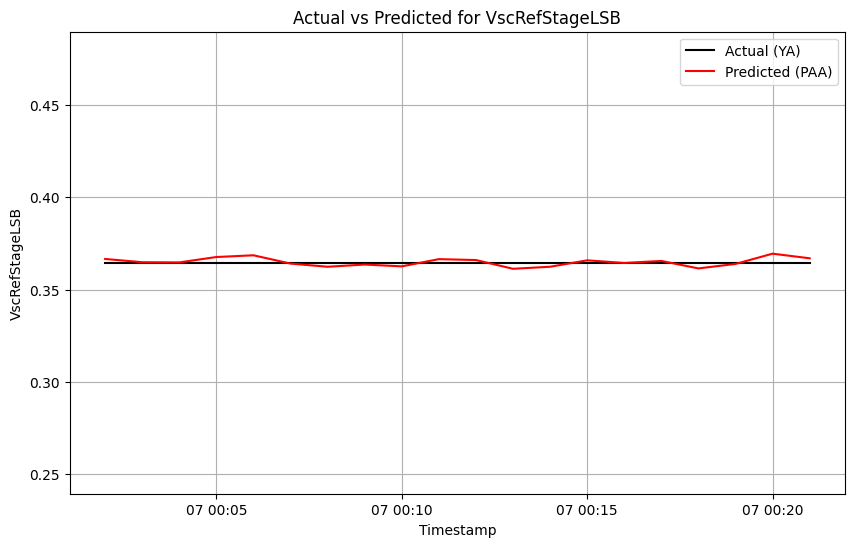

In [24]:
import matplotlib.pyplot as plt
# Concatenate test_y_timestamp_elements with y_test_without_timestamp
y_testA_with_timestamp = np.concatenate((testA_y_timestamp_elements[:, :, np.newaxis], y_testA_without_timestamp), axis=-1)
predictionA_with_timestamp = np.concatenate((testA_y_timestamp_elements[:, :, np.newaxis], predictionsAA), axis=-1)
y_testA_with_timestamp.shape


# In[436]:


YA = pd.DataFrame(y_testA_with_timestamp[50], columns = ['Date/Timestamp', 'RTD', '1st Suct TC1', 'Air Inlet TC2', 'Evap In TC3',
       'Evap Out TC4', '2nd Suct TC6', 'Liquid Line TC7',
       '2nd Sump TC9', 'BPHX TC10', 'Setpoint', 'Voltage', 'WA',
       'CA', '1st RPM', '2nd RPM', 'Fan RPM', 'BUS RTD', 'RSSI',
       'State', 'HxHxRec', 'VscRefStageMSB', 'VscRefStageLSB'])
PAA = pd.DataFrame(predictionA_with_timestamp[50], columns = ['Date/Timestamp', 'RTD', '1st Suct TC1', 'Air Inlet TC2', 'Evap In TC3',
       'Evap Out TC4', '2nd Suct TC6', 'Liquid Line TC7',
       '2nd Sump TC9', 'BPHX TC10', 'Setpoint', 'Voltage', 'WA',
       'CA', '1st RPM', '2nd RPM', 'Fan RPM', 'BUS RTD', 'RSSI',
       'State', 'HxHxRec', 'VscRefStageMSB', 'VscRefStageLSB'])


p_col = ['1st Suct TC1','Evap In TC3','Evap Out TC4','2nd Suct TC6','2nd Sump TC9','BPHX TC10','2nd RPM','Fan RPM','BUS RTD','RSSI','State', 'HxHxRec','Air Inlet TC2','Liquid Line TC7','Setpoint','Voltage','RTD','WA','CA','1st RPM','VscRefStageMSB','VscRefStageLSB']


for column_name in p_col: # Example column name

    average = np.median (YA[column_name])
    
    max1 = np.max(YA[column_name])
    min1 = np.min(YA[column_name])
    range1 = np.max(YA[column_name]) - np.min(YA[column_name])
    print (max1)
    print(min1)
    print(range1)
    average = (max1+min1)/2
    print(average)
    flag =0

    plt.figure(figsize=(10, 6))
    plt.plot(YA['Date/Timestamp'], YA[column_name], label='Actual (YA)', color='black')
    plt.plot(PAA['Date/Timestamp'], PAA[column_name], label='Predicted (PAA)', color='red')
    plt.xlabel('Timestamp')
    plt.ylabel(column_name)
    plt.title(f'Actual vs Predicted for {column_name}')
    plt.legend()
    # Set y-axis limits
    if range1 < 0.25:
        plt.ylim(-0.125+average, 0.125+average)
        flag = 1
    plt.grid(True)
    print(flag)
    plt.show()